### EDA on Hyperglycemic patients

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

In [2]:
patient_df = pd.read_csv('../data/hyperglycemic_patients_w_bin_categories.csv', index_col=0)

#Print shape and data preview
print("Dataframe shape:   ", patient_df.shape)
print("Dataframe Features:", patient_df.columns)
patient_df.head()

Dataframe shape:    (13424, 17)
Dataframe Features: Index(['glucose_max', 'anchor_age', 'dod', 'gender', 'dbp_mean', 'sbp_mean',
       'glucose_mean', 'heart_rate_mean', 'spo2_mean', 'resp_rate_mean',
       'temperature_mean', 'apsiii', 'glucose_score', 'los', 'avg_bmi_value',
       'avg_sofa', 'admission_type'],
      dtype='object')


,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value,avg_sofa,admission_type
0,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,37.186250,38,3,1.938414,26.750000,3.0,OBSERVATION ADMIT
1,2340.0,35,0,0,77.769231,122.961538,468.592593,105.361111,96.093023,19.813953,36.727586,87,5,4.472905,30.558477,7.0,EW EMER.
2,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,70.000000,26.333333,31.900000,88,3,0.309664,30.558477,10.0,EW EMER.
3,406.0,24,0,0,57.333333,92.848485,292.000000,86.631579,96.162162,15.289474,33.590000,150,5,17.513646,30.558477,13.0,EW EMER.
4,398.0,31,0,0,78.600000,133.800000,285.000000,100.826087,90.304348,25.173913,36.593333,34,5,2.794167,30.558477,1.0,EW EMER.


In [15]:
corr_matrix = patient_df.corr()
corr_matrix['los'].sort_values(ascending=False)

los                            1.000000
label                          0.809408
apsiii                         0.383104
avg_sofa                       0.367869
resp_rate_mean                 0.113392
temperature_mean               0.102781
URGENT                         0.084798
heart_rate_mean                0.072761
spo2_mean                      0.056197
dod                            0.051140
ELECTIVE                       0.007792
anchor_age                     0.007638
avg_bmi_value                  0.000783
DIRECT EMER.                   0.000502
AMBULATORY OBSERVATION        -0.005044
SURGICAL SAME DAY ADMISSION   -0.006195
glucose_mean                  -0.006446
OBSERVATION ADMIT             -0.012943
DIRECT OBSERVATION            -0.020328
EU OBSERVATION                -0.030806
gender                        -0.038733
glucose_score                 -0.047090
EW EMER.                      -0.049327
glucose_max                   -0.058765
dbp_mean                      -0.062650


Min value: 0.0169791666666666 
Max value:  86.31248842592593


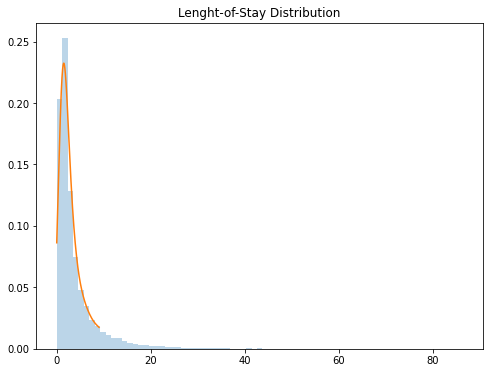

In [20]:
# patient_df.los.plot(kind='hist', bins=60)
print("Min value:", min(patient_df.los), "\nMax value: ", max(patient_df.los))


kde = stats.gaussian_kde(patient_df.los)
X_discrete = np.linspace(0, 9, 1000)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(patient_df.los, density=True, bins=75, alpha=0.3)
ax.plot(X_discrete, kde(X_discrete))
plt.title("Lenght-of-Stay Distribution")
plt.show()

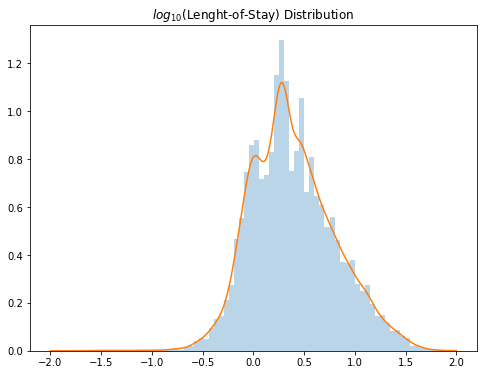

In [28]:
# Lookng at teh log transformation perspective.
patient_df['log10_los'] = np.log10(patient_df.los)

kde = stats.gaussian_kde(patient_df['log10_los'])
X_discrete = np.linspace(-2, 2, 1000)

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(patient_df['log10_los'], density=True, bins=75, alpha=0.3)
ax.plot(X_discrete, kde(X_discrete))
plt.title("$log_{10}$(Lenght-of-Stay) Distribution")
plt.show()

### EDA on labelled patients

In [3]:
labelled_df = pd.read_csv('../data/hyperglycemic_patients_w_bin_categories.csv', index_col=0)

#Print shape and data preview
print("Dataframe shape:   ", labelled_df.shape)
print("Dataframe Features:", labelled_df.columns)
labelled_df.head()

Dataframe shape:    (13243, 27)
Dataframe Features: Index(['glucose_max', 'anchor_age', 'dod', 'gender', 'dbp_mean', 'sbp_mean',
       'glucose_mean', 'heart_rate_mean', 'spo2_mean', 'resp_rate_mean',
       'temperature_mean', 'apsiii', 'glucose_score', 'los', 'avg_bmi_value',
       'avg_sofa', 'admission_type', 'label', 'AMBULATORY OBSERVATION',
       'DIRECT EMER.', 'DIRECT OBSERVATION', 'ELECTIVE', 'EU OBSERVATION',
       'EW EMER.', 'OBSERVATION ADMIT', 'SURGICAL SAME DAY ADMISSION',
       'URGENT'],
      dtype='object')


,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,...,label,AMBULATORY OBSERVATION,DIRECT EMER.,DIRECT OBSERVATION,ELECTIVE,EU OBSERVATION,EW EMER.,OBSERVATION ADMIT,SURGICAL SAME DAY ADMISSION,URGENT
0,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,1.963788,1.239203,...,0,0,0,0,0,0,0,1,0,0
1,259.0,19,1,1,49.300000,74.200000,259.000000,89.750000,1.845098,1.420506,...,0,0,0,0,0,0,1,0,0,0
2,406.0,24,0,0,57.333333,92.848485,292.000000,86.631579,1.983004,1.184393,...,2,0,0,0,0,0,1,0,0,0
3,398.0,31,0,0,78.600000,133.800000,285.000000,100.826087,1.955709,1.400951,...,0,0,0,0,0,0,1,0,0,0
4,487.0,34,0,1,107.062500,164.437500,235.777778,77.000000,1.996731,1.398870,...,2,0,0,0,0,0,0,0,0,1


In [21]:
corr_matrix = labelled_df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                          1.000000
los                            0.809348
apsiii                         0.387943
avg_sofa                       0.385823
resp_rate_mean                 0.123514
URGENT                         0.095967
temperature_mean               0.094506
heart_rate_mean                0.071641
dod                            0.071128
spo2_mean                      0.063940
anchor_age                     0.031209
ELECTIVE                       0.013275
DIRECT EMER.                   0.007137
avg_bmi_value                  0.001186
AMBULATORY OBSERVATION        -0.006192
OBSERVATION ADMIT             -0.011232
SURGICAL SAME DAY ADMISSION   -0.021741
DIRECT OBSERVATION            -0.022336
glucose_mean                  -0.028198
EU OBSERVATION                -0.035068
gender                        -0.036643
glucose_score                 -0.052072
EW EMER.                      -0.055429
glucose_max                   -0.078175
dbp_mean                      -0.086716


Text(0.5, 1.0, 'Number of Each Label')

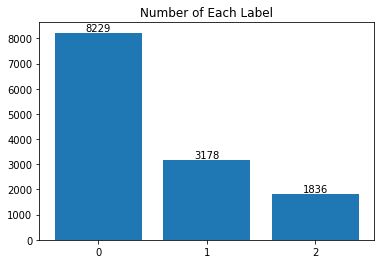

In [14]:
fig, axs = plt.subplots()
x = ["0","1","2"]
y = labelled_df["label"].value_counts().values
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+50, y[i], ha = 'center')
axs.bar(x, y)
addlabels(x, y)
axs.set_title("Number of Each Label")


In [30]:
abs(corr_matrix['label']).sort_values(ascending=False).index

Index(['label', 'los', 'apsiii', 'avg_sofa', 'resp_rate_mean', 'sbp_mean',
       'URGENT', 'temperature_mean', 'dbp_mean', 'glucose_max',
       'heart_rate_mean', 'dod', 'spo2_mean', 'EW EMER.', 'glucose_score',
       'gender', 'EU OBSERVATION', 'anchor_age', 'glucose_mean',
       'DIRECT OBSERVATION', 'SURGICAL SAME DAY ADMISSION', 'ELECTIVE',
       'OBSERVATION ADMIT', 'DIRECT EMER.', 'AMBULATORY OBSERVATION',
       'avg_bmi_value'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between label and other features')

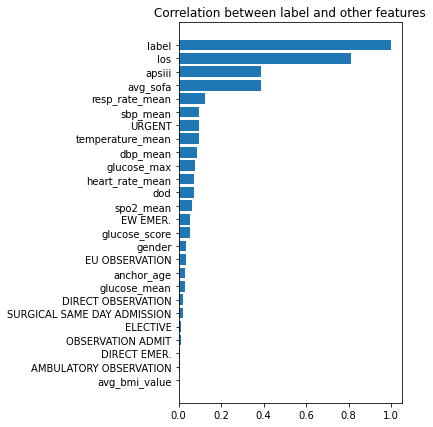

In [38]:
fig, ax = plt.subplots(figsize=(4,7))
x = abs(corr_matrix['label']).sort_values(ascending=True).index
y = abs(corr_matrix['label']).sort_values(ascending=True).values
ax.barh(x,y)
ax.set_title("Correlation between label and other features")

### Log Transformation

In [41]:
labelled_df[['spo2_mean', 'resp_rate_mean', 'glucose_score', 'avg_sofa']] = np.log10(labelled_df[['spo2_mean', 'resp_rate_mean', 'glucose_score', 'avg_sofa']])

In [42]:
labelled_df[['spo2_mean', 'resp_rate_mean', 'glucose_score', 'avg_sofa']].head()

,spo2_mean,resp_rate_mean,glucose_score,avg_sofa
0,1.963788,1.239203,0.477121,0.477121
1,1.845098,1.420506,0.477121,1.000000
2,1.983004,1.184393,0.698970,1.113943
3,1.955709,1.400951,0.698970,0.000000
4,1.996731,1.398870,0.698970,1.146128


In [30]:
# corr_matrix_log = labelled_df.corr()
# corr_matrix_log['los'].sort_values(ascending=False)

los                 1.000000
label               0.809348
apsiii              0.385409
avg_sofa            0.341653
resp_rate_mean      0.117355
temperature_mean    0.101704
heart_rate_mean     0.073019
spo2_mean           0.054088
dod                 0.051786
anchor_age          0.005126
avg_bmi_value       0.000857
glucose_mean       -0.022177
gender             -0.038947
glucose_score      -0.043970
dbp_mean           -0.061729
glucose_max        -0.066686
sbp_mean           -0.075633
Name: los, dtype: float64

In [36]:
# corr_df = pd.merge(corr_matrix['los'], corr_matrix_log['los'], left_index=True, right_index=True)
# corr_df

,los_x,los_y
glucose_max,-0.066686,-0.066686
anchor_age,0.005126,0.005126
dod,0.051786,0.051786
gender,-0.038947,-0.038947
dbp_mean,-0.061729,-0.061729
sbp_mean,-0.075633,-0.075633
glucose_mean,-0.022177,-0.022177
heart_rate_mean,0.073019,0.073019
spo2_mean,0.055056,0.054088
resp_rate_mean,0.115687,0.117355


In [39]:
labelled_df.describe()

,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value,avg_sofa,label
count,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000,13243.000000
mean,304.073322,63.782300,0.495054,0.462282,63.321114,119.969173,202.770618,87.599961,96.796241,19.829660,36.807399,55.074681,3.540587,3.869050,30.612228,5.640187,0.517254
std,130.174082,15.969862,0.499994,0.498594,11.338351,17.629675,54.623906,16.161446,2.671512,3.995450,0.621087,22.556210,0.921923,4.645552,37.773301,3.603818,0.725962
min,200.000000,18.000000,0.000000,0.000000,17.000000,64.000000,42.000000,28.500000,51.250000,9.960000,30.666667,12.000000,3.000000,0.016979,3.400000,1.000000,0.000000
25%,222.000000,54.000000,0.000000,0.000000,55.446248,107.097179,166.500000,76.085145,95.640000,16.961538,36.582250,39.000000,3.000000,1.253368,26.214000,3.000000,0.000000
50%,258.000000,65.000000,0.000000,0.000000,62.450000,117.500000,196.666667,86.700000,97.153846,19.250000,36.806667,50.000000,3.000000,2.201389,30.558477,5.000000,0.000000
75%,328.000000,76.000000,1.000000,1.000000,69.960769,131.087121,231.800000,98.360000,98.500000,22.142857,37.084808,67.000000,5.000000,4.374595,30.558477,8.000000,1.000000
max,996.000000,91.000000,1.000000,1.000000,126.458333,217.750000,498.000000,166.307692,100.000000,40.880000,39.950000,167.000000,9.000000,39.965972,2332.250000,15.000000,2.000000


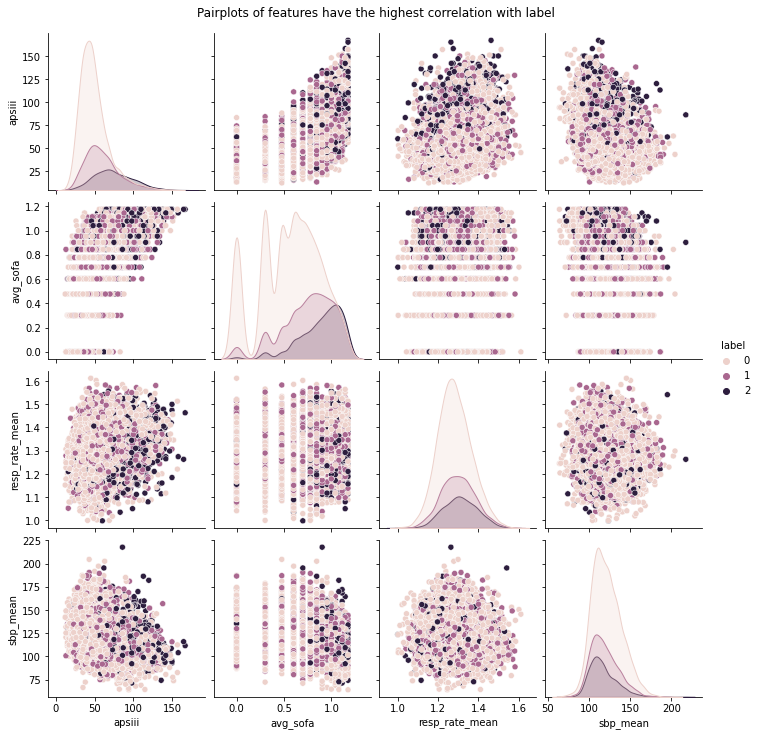

In [47]:
columns = ['apsiii', 'avg_sofa', 'resp_rate_mean', 'sbp_mean', 'label']
# , 'anchor_age', 'gender', 'dbp_mean', 'sbp_mean',
#        'glucose_mean', 'heart_rate_mean', 'spo2_mean', 'resp_rate_mean',
#        'temperature_mean', 'apsiii', 'glucose_score', 'los', 'avg_bmi_value',
#        'avg_sofa'
g = sns.pairplot(labelled_df[columns], hue='label')
g.fig.suptitle("Pairplots of features have the highest correlation with label", y=1.02)
plt.show()

In [10]:
labelled_df[labelled_df.label == 0]

,glucose_max,anchor_age,dod,gender,dbp_mean,sbp_mean,glucose_mean,heart_rate_mean,spo2_mean,resp_rate_mean,temperature_mean,apsiii,glucose_score,los,avg_bmi_value,avg_sofa,admission_type,label
0,277.0,36,0,0,64.320000,112.880000,221.272727,101.800000,92.000000,17.346154,37.186250,38,3,1.938414,26.750000,3.0,OBSERVATION ADMIT,0.0
3,406.0,24,0,0,57.333333,92.848485,292.000000,86.631579,96.162162,15.289474,33.590000,150,5,17.513646,30.558477,13.0,EW EMER.,0.0
5,487.0,34,0,1,107.062500,164.437500,235.777778,77.000000,99.250000,25.053571,33.001250,91,5,9.107917,23.400000,14.0,URGENT,0.0
7,549.0,39,1,0,77.100000,120.400000,286.638889,96.032258,91.366667,17.300000,35.898333,37,5,3.619190,21.040909,1.0,EW EMER.,0.0
9,276.0,23,1,1,70.571429,138.857143,208.083333,111.714286,96.107143,19.648148,37.055000,98,3,5.124086,60.397619,12.0,EW EMER.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13230,221.0,91,1,1,54.500000,99.416667,111.750000,112.560000,96.703704,15.685185,37.195000,58,3,1.266667,30.558477,8.0,EW EMER.,0.0
13231,303.0,91,0,1,61.074074,100.944444,209.166667,66.120000,96.960000,15.730769,35.570000,86,3,7.966424,30.558477,11.0,EW EMER.,0.0
13235,213.0,91,1,0,54.541667,117.208333,170.500000,66.050000,95.650000,24.600000,36.701667,69,3,2.729190,24.600000,10.0,EW EMER.,0.0
13240,233.0,91,1,0,56.520000,110.440000,194.125000,69.200000,94.160000,24.400000,36.466000,35,3,1.501644,30.558477,3.0,OBSERVATION ADMIT,0.0
